In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import pickle
import visutils
import camutils as cam
import selectpoints
import meshutils
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
import scipy
import trimesh

In [2]:
def reconstruct(imprefixL,imprefixR,threshold,camL,camR):
    """
    Simple reconstruction based on triangulating matched pairs of points
    between to view which have been encoded with a 20bit gray code.

    Parameters
    ----------
    imprefix : str
      prefix for where the images are stored

    threshold : float
      decodability threshold

    camL,camR : Camera
      camera parameters

    Returns
    -------
    pts2L,pts2R : 2D numpy.array (dtype=float)

    pts3 : 2D numpy.array (dtype=float)

    """
    img_backgroundLColor = plt.imread(imprefixL+"/color_C0_00.png")
    imgLColor = plt.imread(imprefixL+"/color_C0_01.png");
    
    img_backgroundRColor = plt.imread(imprefixR+"/color_C1_00.png")
    imgRColor = plt.imread(imprefixR+"/color_C1_01.png");

    imgL = np.mean(imgLColor, axis = 2)
    img_backgroundL = np.mean(img_backgroundLColor, axis = 2)
    maskL = np.zeros((imgL.shape[0], imgL.shape[1]))

    imgR = np.mean(imgRColor, axis = 2)
    img_backgroundR = np.mean(img_backgroundRColor, axis = 2)
    maskR = np.zeros((imgR.shape[0], imgR.shape[1]))

    

    CLh,maskLh = cam.decode(imprefixL+"/frame_C0_",0,threshold)
    CLv,maskLv = cam.decode(imprefixL+"/frame_C0_",20,threshold)
    CRh,maskRh = cam.decode(imprefixR+"/frame_C1_",0,threshold)
    CRv,maskRv = cam.decode(imprefixR+"/frame_C1_",20,threshold)
    
    threshold = 0.001
    for i in range (imgL.shape[0]):
                for j in range(imgL.shape[1]):
                    if (abs(imgL[i,j] - img_backgroundL[i,j]) >= threshold):
                        maskL[i,j] = 1
                    else:
                         maskL[i,j] = 0
                    if (abs(imgR[i,j] - img_backgroundR[i,j]) >= threshold):
                        maskR[i,j] = 1
                    else:
                         maskR[i,j] = 0

    CL = CLh + 1024*CLv
    maskL = maskLh*maskLv*maskL
    CR = CRh + 1024*CRv
    maskR = maskRh*maskRv*maskR
    
    
    plt.imshow(CL*maskL)
    plt.title(imprefixL + "left")
    plt.show()

    plt.imshow(CR*maskR)
    plt.title(imprefixR + "right")
    plt.show()

    h = CR.shape[0]
    w = CR.shape[1]

    subR = np.nonzero(maskR.flatten())
    subL = np.nonzero(maskL.flatten())

    CRgood = CR.flatten()[subR]
    CLgood = CL.flatten()[subL]

    _,submatchR,submatchL = np.intersect1d(CRgood,CLgood,return_indices=True)

    matchR = subR[0][submatchR]
    matchL = subL[0][submatchL]

    xx,yy = np.meshgrid(range(w),range(h))
    xx = np.reshape(xx,(-1,1))
    yy = np.reshape(yy,(-1,1))

    pts2R = np.concatenate((xx[matchR].T,yy[matchR].T),axis=0)
    pts2L = np.concatenate((xx[matchL].T,yy[matchL].T),axis=0)

    pts3 = cam.triangulate(pts2L,camL,pts2R,camR)
    color= []
    
    return pts2L,pts2R,pts3

In [3]:
resultfile = 'cameras.pickle'
fid = open(resultfile, "rb")
(camL, camR) = pickle.load(fid)
fid.close()

loading( 0 1 )( 2 3 )( 4 5 )( 6 7 )( 8 9 )( 10 11 )( 12 13 )( 14 15 )( 16 17 )( 18 19 )

loading( 20 21 )( 22 23 )( 24 25 )( 26 27 )( 28 29 )( 30 31 )( 32 33 )( 34 35 )( 36 37 )( 38 39 )

loading( 0 1 )( 2 3 )( 4 5 )( 6 7 )( 8 9 )( 10 11 )( 12 13 )( 14 15 )( 16 17 )( 18 19 )

loading( 20 21 )( 22 23 )( 24 25 )( 26 27 )( 28 29 )( 30 31 )( 32 33 )( 34 35 )( 36 37 )( 38 39 )



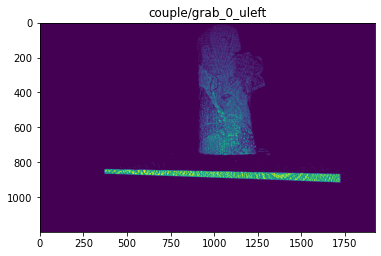

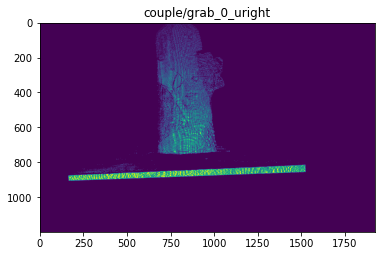

loading( 0 1 )( 2 3 )( 4 5 )( 6 7 )( 8 9 )( 10 11 )( 12 13 )( 14 15 )( 16 17 )( 18 19 )

loading( 20 21 )( 22 23 )( 24 25 )( 26 27 )( 28 29 )( 30 31 )( 32 33 )( 34 35 )( 36 37 )( 38 39 )

loading( 0 1 )( 2 3 )( 4 5 )( 6 7 )( 8 9 )( 10 11 )( 12 13 )( 14 15 )( 16 17 )( 18 19 )

loading( 20 21 )( 22 23 )( 24 25 )( 26 27 )( 28 29 )( 30 31 )( 32 33 )( 34 35 )( 36 37 )( 38 39 )



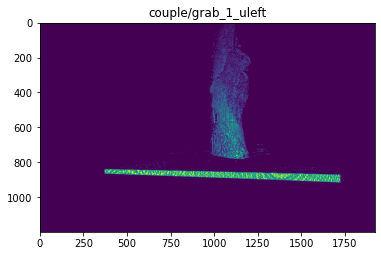

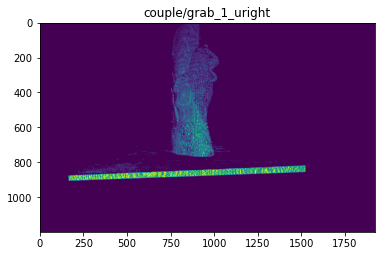

loading( 0 1 )( 2 3 )( 4 5 )( 6 7 )( 8 9 )( 10 11 )( 12 13 )( 14 15 )( 16 17 )( 18 19 )

loading( 20 21 )( 22 23 )( 24 25 )( 26 27 )( 28 29 )( 30 31 )( 32 33 )( 34 35 )( 36 37 )( 38 39 )

loading( 0 1 )( 2 3 )( 4 5 )( 6 7 )( 8 9 )( 10 11 )( 12 13 )( 14 15 )( 16 17 )( 18 19 )

loading( 20 21 )( 22 23 )( 24 25 )( 26 27 )( 28 29 )( 30 31 )( 32 33 )( 34 35 )( 36 37 )( 38 39 )



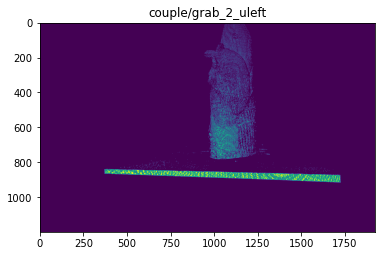

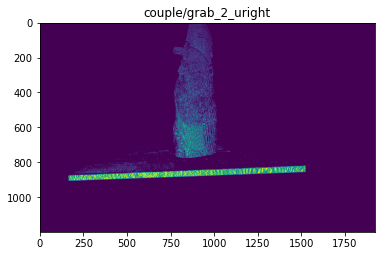

loading( 0 1 )( 2 3 )( 4 5 )( 6 7 )( 8 9 )( 10 11 )( 12 13 )( 14 15 )( 16 17 )( 18 19 )

loading( 20 21 )( 22 23 )( 24 25 )( 26 27 )( 28 29 )( 30 31 )( 32 33 )( 34 35 )( 36 37 )( 38 39 )

loading( 0 1 )( 2 3 )( 4 5 )( 6 7 )( 8 9 )( 10 11 )( 12 13 )( 14 15 )( 16 17 )( 18 19 )

loading( 20 21 )( 22 23 )( 24 25 )( 26 27 )( 28 29 )( 30 31 )( 32 33 )( 34 35 )( 36 37 )( 38 39 )



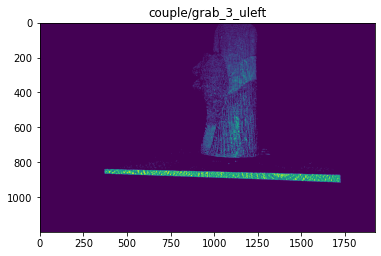

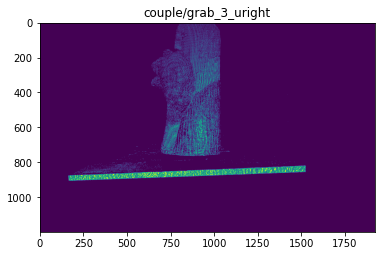

loading( 0 1 )( 2 3 )( 4 5 )( 6 7 )( 8 9 )( 10 11 )( 12 13 )( 14 15 )( 16 17 )( 18 19 )

loading( 20 21 )( 22 23 )( 24 25 )( 26 27 )( 28 29 )( 30 31 )( 32 33 )( 34 35 )( 36 37 )( 38 39 )

loading( 0 1 )( 2 3 )( 4 5 )( 6 7 )( 8 9 )( 10 11 )( 12 13 )( 14 15 )( 16 17 )( 18 19 )

loading( 20 21 )( 22 23 )( 24 25 )( 26 27 )( 28 29 )( 30 31 )( 32 33 )( 34 35 )( 36 37 )( 38 39 )



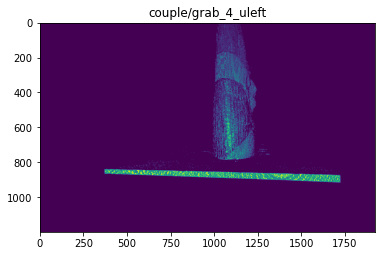

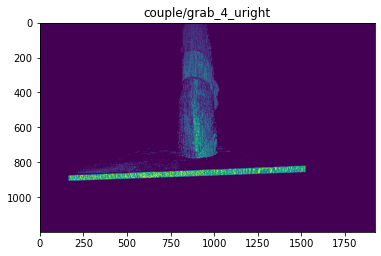

loading( 0 1 )( 2 3 )( 4 5 )( 6 7 )( 8 9 )( 10 11 )( 12 13 )( 14 15 )( 16 17 )( 18 19 )

loading( 20 21 )( 22 23 )( 24 25 )( 26 27 )( 28 29 )( 30 31 )( 32 33 )( 34 35 )( 36 37 )( 38 39 )

loading( 0 1 )( 2 3 )( 4 5 )( 6 7 )( 8 9 )( 10 11 )( 12 13 )( 14 15 )( 16 17 )( 18 19 )

loading( 20 21 )( 22 23 )( 24 25 )( 26 27 )( 28 29 )( 30 31 )( 32 33 )( 34 35 )( 36 37 )( 38 39 )



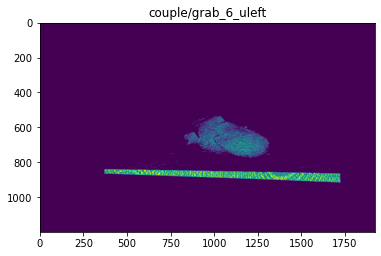

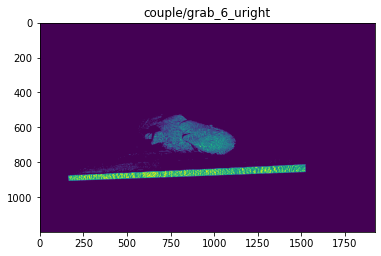

In [7]:
resultfile = 'pts_value.pickle'
fid = open(resultfile, "wb" ) 
threshold = 0.05
results = {}
for x in range (7):
    if (x!= 5):
        imprefix = "couple/grab_"+str(x)+"_u"
        pts2L,pts2R,pts3 = reconstruct(imprefix,imprefix,threshold,camL,camR)
        results[x] = {"pts2L": pts2L, "pts2R": pts2R, "pts3": pts3}
pickle.dump(results,fid)
fid.close()